In [2]:
from datasets import load_dataset

dataset = load_dataset("ibm/MedMentions-ZS")

/Users/shashankjatav/.virtualenvs/bioner/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/shashankjatav/.virtualenvs/bioner/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 26770
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1289
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1048
    })
})

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 26770
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1289
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 1048
    })
})

In [5]:
df_train = dataset["test"].to_pandas()
df_train

,tokens,ner_tags
0,"[DCTN4, as, a, modifier, of, chronic, Pseudomo...","[B-T103, O, O, O, O, B-T038, I-T038, I-T038, I..."
1,"[Pseudomonas, aeruginosa, (, Pa, ), infection,...","[B-T038, I-T038, I-T038, I-T038, I-T038, I-T03..."
2,"[By, using, exome, sequencing, and, extreme, p...","[O, O, B-T062, I-T062, O, O, O, O, O, O, O, O,..."
3,"[The, purpose, of, this, study, was, to, inves...","[O, O, O, O, B-T062, O, O, O, O, O, O, B-T103,..."
4,"[Polymerase, chain, reaction, and, direct, seq...","[B-T062, I-T062, I-T062, O, B-T062, I-T062, O,..."
...,...,...
26765,"[Radiographic, underestimation, of, the, true,...","[B-T058, B-T033, O, O, O, O, O, O, O, O, O, O,..."
26766,"[Variation, between, clinicians, was, huge, (,...","[O, O, O, O, B-T033, O, O, B-T058, I-T058, O, ..."
26767,"[All, evaluation, methods, significantly, unde...","[O, B-T062, I-T062, O, O, O, O, O, O, O]"
26768,"[Bone, sounding, was, most, accurate, ,, where...","[B-T058, I-T058, O, O, O, O, O, B-T058, I-T058..."


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print("Number of samples:", len(df_train))
print("Columns:", df_train.columns)
print("Example sample:")
print(df_train.head())

Number of samples: 26770
Columns: Index(['tokens', 'ner_tags'], dtype='object')
Example sample:
                                              tokens  \
0  [DCTN4, as, a, modifier, of, chronic, Pseudomo...   
1  [Pseudomonas, aeruginosa, (, Pa, ), infection,...   
2  [By, using, exome, sequencing, and, extreme, p...   
3  [The, purpose, of, this, study, was, to, inves...   
4  [Polymerase, chain, reaction, and, direct, seq...   

                                            ner_tags  
0  [B-T103, O, O, O, O, B-T038, I-T038, I-T038, I...  
1  [B-T038, I-T038, I-T038, I-T038, I-T038, I-T03...  
2  [O, O, B-T062, I-T062, O, O, O, O, O, O, O, O,...  
3  [O, O, O, O, B-T062, O, O, O, O, O, O, B-T103,...  
4  [B-T062, I-T062, I-T062, O, B-T062, I-T062, O,...  


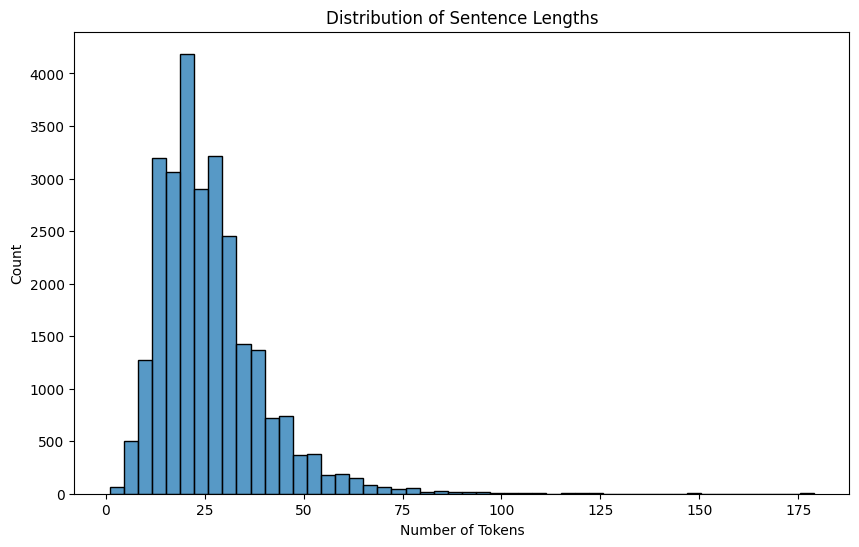

In [10]:
df_train['num_tokens'] = df_train['tokens'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='num_tokens', bins=50)
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Count")
plt.show()

In [12]:
from collections import Counter
all_ner_tags_train = [tag for sublist in dataset['test']['ner_tags'] for tag in sublist]

ner_tag_counts_train = Counter(all_ner_tags_train)

# Print the counts
print("NER Tag Counts:")
for tag, count in ner_tag_counts_train.items():
    print(f"{tag}: {count}")

NER Tag Counts:
B-T103: 22360
O: 515420
B-T038: 25007
I-T038: 15708
B-T033: 9824
I-T033: 6432
B-T062: 5445
I-T062: 4392
I-T103: 14011
B-T098: 3574
B-T017: 12575
I-T017: 7474
B-T074: 1165
I-T074: 1030
B-T082: 7511
I-T082: 2998
B-T058: 14779
I-T058: 12088
B-T170: 5996
I-T098: 881
I-T170: 5118
B-T204: 4922
I-T204: 2360


In [13]:
all_ner_tags_test = [tag for sublist in dataset['test']['ner_tags'] for tag in sublist]

ner_tag_counts_test = Counter(all_ner_tags_test)

# Print the counts
print("NER Tag Counts:")
for tag, count in ner_tag_counts_test.items():
    print(f"{tag}: {count}")

NER Tag Counts:
O: 27433
B-T031: 212
B-T097: 360
I-T097: 136
B-T007: 448
I-T007: 555
B-T168: 321
I-T168: 115
I-T031: 69
B-T022: 89
I-T022: 45


In [14]:
all_ner_tags_val = [tag for sublist in dataset['validation']['ner_tags'] for tag in sublist]

ner_tag_counts_val = Counter(all_ner_tags_val)

# Print the counts
print("NER Tag Counts:")
for tag, count in ner_tag_counts_val.items():
    print(f"{tag}: {count}")

NER Tag Counts:
O: 34400
B-T201: 404
I-T201: 236
B-T091: 196
B-T037: 434
B-T005: 224
B-T092: 452
I-T091: 124
I-T092: 478
I-T037: 225
I-T005: 124


## No overlap between train test and validation

### Another version of medmention

In [3]:
dataset_new = load_dataset("bigbio/medmentions")

/Users/shashankjatav/.virtualenvs/bioner/lib/python3.9/site-packages/datasets/load.py:1429: FutureWarning: The repository for bigbio/medmentions contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/bigbio/medmentions
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Generating train split: 2635 examples [00:01, 2080.39 examples/s]
Generating test split: 879 examples [00:00, 1697.26 examples/s]
Generating validation split: 878 examples [00:00, 1853.33 examples/s]


In [4]:
dataset_new

DatasetDict({
    train: Dataset({
        features: ['pmid', 'passages', 'entities'],
        num_rows: 2635
    })
    test: Dataset({
        features: ['pmid', 'passages', 'entities'],
        num_rows: 879
    })
    validation: Dataset({
        features: ['pmid', 'passages', 'entities'],
        num_rows: 878
    })
})

In [11]:
dataset_new["train"][0].get('entities')

[{'text': ['DCTN4'],
  'offsets': [[0, 5]],
  'concept_id': 'C4308010',
  'semantic_type_id': ['T116', 'T123']},
 {'text': ['chronic Pseudomonas aeruginosa infection'],
  'offsets': [[23, 63]],
  'concept_id': 'C0854135',
  'semantic_type_id': ['T047']},
 {'text': ['cystic fibrosis'],
  'offsets': [[67, 82]],
  'concept_id': 'C0010674',
  'semantic_type_id': ['T047']},
 {'text': ['Pseudomonas aeruginosa (Pa) infection'],
  'offsets': [[83, 120]],
  'concept_id': 'C0854135',
  'semantic_type_id': ['T047']},
 {'text': ['cystic fibrosis'],
  'offsets': [[124, 139]],
  'concept_id': 'C0010674',
  'semantic_type_id': ['T047']},
 {'text': ['CF'],
  'offsets': [[141, 143]],
  'concept_id': 'C0010674',
  'semantic_type_id': ['T047']},
 {'text': ['patients'],
  'offsets': [[145, 153]],
  'concept_id': 'C0030705',
  'semantic_type_id': ['T101']},
 {'text': ['long-term'],
  'offsets': [[179, 188]],
  'concept_id': 'C0443252',
  'semantic_type_id': ['T079']},
 {'text': ['pulmonary disease'],
  'of

In [9]:
dataset['train'][0]

{'tokens': ['DCTN4',
  'as',
  'a',
  'modifier',
  'of',
  'chronic',
  'Pseudomonas',
  'aeruginosa',
  'infection',
  'in',
  'cystic',
  'fibrosis'],
 'ner_tags': ['B-T103',
  'O',
  'O',
  'O',
  'O',
  'B-T038',
  'I-T038',
  'I-T038',
  'I-T038',
  'O',
  'B-T038',
  'I-T038']}

### Earlier dataset was wrong

Convert this dataset to proper format for training

In [12]:
dataset_new["train"][0]

{'pmid': '25763772',
 'passages': [{'type': 'title',
   'text': ['DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis'],
   'offsets': [[0, 82]]},
  {'type': 'abstract',
   'text': ['Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA s

In [36]:
import re
[(m.start(0), m.end(0)) for m in re.finditer('Pseudomonas', 'DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis')]

[(31, 42)]

In [35]:
'Pseudomonas' in 'DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis'

True

In [26]:
def get_token_role_in_span(token_start: int, token_end: int, span_start: int, span_end: int):
    """
    Check if the token is inside a span.
    Args:
      - token_start, token_end: Start and end offset of the token
      - span_start, span_end: Start and end of the span
    Returns:
      - "B" if beginning
      - "I" if inner
      - "O" if outer
      - "N" if not valid token (like <SEP>, <CLS>, <UNK>)
    """
    if token_end <= token_start:
        return "N"
    if token_start < span_start or token_end > span_end:
        return "O"
    if token_start > span_start:
        return "I"
    else:
        return "B"

In [103]:
"CF.".find("test CF")

-1

In [104]:
def get_semantic_type(searchstr: str, entities: list, token_start: int, token_end: int) -> str:
    for i in entities:
        span_start = i.get('offsets')[0][0]
        span_end = i.get('offsets')[0][1]
        if token_start>=span_start and token_end<=span_end:
            if searchstr in i.get('text')[0]:
                return get_token_role_in_span(token_start, token_end, span_start, span_end)+'-' + i.get('semantic_type_id')[0]
    return "O"


In [77]:
get_semantic_type("chronic",  dataset_new["train"][0].get('entities'), 23, 30)

'B-T047'

In [65]:
all_tokens = []
ner_tags = []

text_combined = dataset_new["train"][0].get('passages')[0].get('text')[0]
text_combined

'DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis'

In [66]:
all_tokens = text_combined.split(" ")
all_tokens

['DCTN4',
 'as',
 'a',
 'modifier',
 'of',
 'chronic',
 'Pseudomonas',
 'aeruginosa',
 'infection',
 'in',
 'cystic',
 'fibrosis']

In [73]:
def assign_tags(all_tokens: str, entities: list, ner_tags: list):
    for count, i in enumerate(all_tokens):
        if count==0:
            token_start=0
        else:
            token_start = token_end+1
        token_end = token_start+len(i)
        print(token_start, token_end)
        ner_tag = get_semantic_type(i, entities, token_start, token_end)
        ner_tags.append(ner_tag)
    return ner_tags

In [76]:
ner_tags = []
assign_tags(all_tokens, dataset_new["train"][0].get('entities'), ner_tags)

0 5
6 8
9 10
11 19
20 22
23 30
31 42
43 53
54 63
64 66
67 73
74 82


['B-T116',
 'O',
 'O',
 'O',
 'O',
 'B-T047',
 'I-T047',
 'I-T047',
 'I-T047',
 'O',
 'B-T047',
 'I-T047']

## Transformation for title is working

Now doing it for abstract

In [90]:
text_combined = dataset_new["train"][0].get('passages')[0].get('text')[0] + ' ' + dataset_new["train"][0].get('passages')[1].get('text')[0]
text_combined

'DCTN4 as a modifier of chronic Pseudomonas aeruginosa infection in cystic fibrosis Pseudomonas aeruginosa (Pa) infection in cystic fibrosis (CF) patients is associated with worse long-term pulmonary disease and shorter survival, and chronic Pa infection (CPA) is associated with reduced lung function, faster rate of lung decline, increased rates of exacerbations and shorter survival. By using exome sequencing and extreme phenotype design, it was recently shown that isoforms of dynactin 4 (DCTN4) may influence Pa infection in CF, leading to worse respiratory disease. The purpose of this study was to investigate the role of DCTN4 missense variants on Pa infection incidence, age at first Pa infection and chronic Pa infection incidence in a cohort of adult CF patients from a single centre. Polymerase chain reaction and direct sequencing were used to screen DNA samples for DCTN4 variants. A total of 121 adult CF patients from the Cochin Hospital CF centre have been included, all of them car

In [163]:
def get_semantic_type(searchstr: str, entities: list, token_start: int, token_end: int) -> str:
    for i in entities:
        span_start = i.get('offsets')[0][0]
        span_end = i.get('offsets')[0][1]
        if (token_start>=span_start and token_end<=span_end):
            if searchstr in i.get('text')[0]:
                return get_token_role_in_span(token_start, token_end, span_start, span_end)+'-' + i.get('semantic_type_id')[0]
            
        if searchstr[-1]=='.':
            if (token_start>=span_start and token_end<=(span_end+1)):
                searchstr = searchstr[:-1]
                if searchstr in i.get('text')[0]:
                    return get_token_role_in_span(token_start, token_end, span_start, span_end+1)+'-' + i.get('semantic_type_id')[0]
    return "O"

In [164]:
all_tokens = text_combined.split(" ")
all_tokens

['DCTN4',
 'as',
 'a',
 'modifier',
 'of',
 'chronic',
 'Pseudomonas',
 'aeruginosa',
 'infection',
 'in',
 'cystic',
 'fibrosis',
 'Pseudomonas',
 'aeruginosa',
 '(Pa)',
 'infection',
 'in',
 'cystic',
 'fibrosis',
 '(CF)',
 'patients',
 'is',
 'associated',
 'with',
 'worse',
 'long-term',
 'pulmonary',
 'disease',
 'and',
 'shorter',
 'survival,',
 'and',
 'chronic',
 'Pa',
 'infection',
 '(CPA)',
 'is',
 'associated',
 'with',
 'reduced',
 'lung',
 'function,',
 'faster',
 'rate',
 'of',
 'lung',
 'decline,',
 'increased',
 'rates',
 'of',
 'exacerbations',
 'and',
 'shorter',
 'survival.',
 'By',
 'using',
 'exome',
 'sequencing',
 'and',
 'extreme',
 'phenotype',
 'design,',
 'it',
 'was',
 'recently',
 'shown',
 'that',
 'isoforms',
 'of',
 'dynactin',
 '4',
 '(DCTN4)',
 'may',
 'influence',
 'Pa',
 'infection',
 'in',
 'CF,',
 'leading',
 'to',
 'worse',
 'respiratory',
 'disease.',
 'The',
 'purpose',
 'of',
 'this',
 'study',
 'was',
 'to',
 'investigate',
 'the',
 'role',
 '

In [165]:
ner_tags = []
test_ner_tags = assign_tags(all_tokens, dataset_new["train"][0].get('entities'), ner_tags)

0 5
6 8
9 10
11 19
20 22
23 30
31 42
43 53
54 63
64 66
67 73
74 82
83 94
95 105
106 110
111 120
121 123
124 130
131 139
140 144
145 153
154 156
157 167
168 172
173 178
179 188
189 198
199 206
207 210
211 218
219 228
229 232
233 240
241 243
244 253
254 259
260 262
263 273
274 278
279 286
287 291
292 301
302 308
309 313
314 316
317 321
322 330
331 340
341 346
347 349
350 363
364 367
368 375
376 385
survival
386 388
389 394
395 400
401 411
412 415
416 423
424 433
434 441
442 444
445 448
449 457
458 463
464 468
469 477
478 480
481 489
490 491
492 499
500 503
504 513
514 516
517 526
527 529
530 533
534 541
542 544
545 550
551 562
563 571
disease
572 575
576 583
584 586
587 591
592 597
598 601
602 604
605 616
617 620
621 625
626 628
629 634
635 643
644 652
653 655
656 658
659 668
669 679
680 683
684 686
687 692
693 695
696 705
706 709
710 717
718 720
721 730
731 740
741 743
744 745
746 752
753 755
756 761
762 764
765 773
774 778
779 780
781 787
788 795
centre
796 806
807 812
813 821
822 825


In [166]:
(len(all_tokens), len(test_ner_tags))

(293, 293)

In [167]:
test_ner_tags[-5:]

['O', 'B-T047', 'O', 'B-T032', 'B-T047']

In [127]:
all_tokens[-1]

'CF.'

In [118]:
dataset_new["train"][0].get('entities')[-2]

{'text': ['male'],
 'offsets': [[1801, 1805]],
 'concept_id': 'C0086582',
 'semantic_type_id': ['T032']}

In [162]:
"CF." in "CF"

False

In [170]:
dataset_transformed = load_dataset("/Users/shashankjatav/.cache/huggingface/datasets/__main__/medmentions_full_source/1.0.0")

Generating train split: 2635 examples [00:00, 96301.06 examples/s]
Generating validation split: 878 examples [00:00, 108251.24 examples/s]
Generating test split: 879 examples [00:00, 155410.08 examples/s]


In [171]:
dataset_transformed

DatasetDict({
    train: Dataset({
        features: ['pmid', 'passages', 'entities', 'tokens', 'ner_tags'],
        num_rows: 2635
    })
    validation: Dataset({
        features: ['pmid', 'passages', 'entities', 'tokens', 'ner_tags'],
        num_rows: 878
    })
    test: Dataset({
        features: ['pmid', 'passages', 'entities', 'tokens', 'ner_tags'],
        num_rows: 879
    })
})

In [174]:
dataset_transformed["train"][1].get("ner_tags")

['B-T169',
 'B-T109',
 'B-T073',
 'O',
 'O',
 'B-T052',
 'O',
 'B-T169',
 'O',
 'B-T033',
 'I-T033',
 'I-T033',
 'O',
 'O',
 'O',
 'B-T074',
 'I-T074',
 'O',
 'B-T073',
 'I-T073',
 'O',
 'B-T082',
 'I-T082',
 'B-T058',
 'O',
 'B-T169',
 'O',
 'O',
 'B-T070',
 'O',
 'B-T033',
 'I-T033',
 'I-T033',
 'O',
 'B-T080',
 'B-T067',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-T169',
 'B-T073',
 'I-T073',
 'I-T073',
 'O',
 'O',
 'B-T067',
 'O',
 'B-T169',
 'B-T073',
 'O',
 'B-T082',
 'I-T082',
 'O',
 'B-T082',
 'B-T082',
 'O',
 'B-T081',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-T167',
 'O',
 'O',
 'B-T080',
 'B-T082',
 'B-T109',
 'O',
 'O',
 'B-T067',
 'O',
 'O',
 'B-T067',
 'I-T067',
 'I-T067',
 'O',
 'O',
 'O',
 'O',
 'B-T057',
 'O',
 'B-T073',
 'I-T073',
 'B-T025',
 'I-T025',
 'I-T025',
 'O',
 'O',
 'B-T073',
 'I-T073',
 'O',
 'O',
 'O',
 'B-T023',
 'I-T023',
 'O',
 'B-T082',
 'O',
 'O',
 'B-T082',
 'O',
 'B-T080',
 'B-T052',
 'B-T073',
 'B-T082',
 'O',
 'O',
 'O',
 'O',
 'B-T059',
 'O

In [176]:
dataset_transformed["train"][1].get('entities')[3]

{'text': ['enhancement'],
 'offsets': [[42, 53]],
 'concept_id': 'C2349975',
 'semantic_type_id': ['T052']}

In [179]:
from collections import Counter
all_ner_tags_train = [tag for sublist in dataset_transformed['train']['ner_tags'] for tag in sublist]

ner_tag_counts_train = Counter(all_ner_tags_train)

# Print the counts
print("NER Tag Counts:")
for tag, count in ner_tag_counts_train.items():
    print(f"{tag}: {count}")

NER Tag Counts:
B-T116: 7494
O: 344529
B-T047: 6200
I-T047: 3731
B-T101: 3586
B-T079: 5428
B-T169: 13528
B-T033: 8853
I-T033: 4724
B-T081: 10153
I-T169: 1204
B-T063: 529
I-T063: 583
B-T052: 4118
I-T052: 218
I-T116: 3356
B-T062: 4730
B-T032: 1723
B-T098: 3301
B-T100: 1179
B-T073: 2052
B-T026: 857
I-T026: 309
I-T073: 1076
B-T028: 2363
B-T045: 2047
I-T045: 697
B-T046: 2185
B-T109: 5001
B-T074: 1304
I-T074: 890
B-T082: 4264
I-T082: 862
B-T058: 3085
B-T070: 1621
B-T080: 17811
B-T067: 1132
B-T167: 953
I-T067: 316
B-T057: 494
B-T025: 3025
I-T025: 1812
B-T023: 3516
I-T023: 1576
B-T059: 2806
I-T081: 3504
B-T077: 1651
B-T042: 981
B-T060: 2263
I-T060: 1818
B-T184: 1024
I-T184: 383
I-T042: 531
B-T024: 931
I-T024: 421
B-T029: 672
B-T078: 5161
B-T053: 250
B-T061: 6389
I-T061: 3488
B-T083: 1379
B-T055: 521
I-T083: 441
I-T058: 1210
B-T185: 669
I-T080: 2645
B-UnknownType: 1270
B-T054: 521
I-T054: 151
I-T062: 2392
I-T055: 215
I-T098: 584
I-T101: 196
B-T170: 4742
I-T170: 3427
B-T097: 993
I-T097: 348
B-T0

In [185]:
all_ner_tags_test = [tag for sublist in dataset_transformed['test']['ner_tags'] for tag in sublist]

ner_tag_counts_test = Counter(all_ner_tags_test)

all_ner_tags_val = [tag for sublist in dataset_transformed['validation']['ner_tags'] for tag in sublist]

ner_tag_counts_val = Counter(all_ner_tags_val)

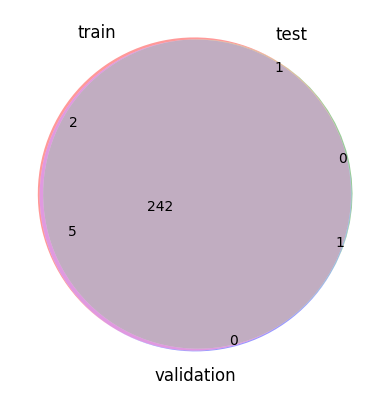

In [186]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = set(ner_tag_counts_train.keys())
set2 = set(ner_tag_counts_test.keys())
set3 = set(ner_tag_counts_val.keys())

venn3([set1, set2, set3], ('train', 'test', 'validation'))

plt.show()

## Train test and validation overlap

In [189]:
all_tags = set(list(ner_tag_counts_train.keys()) + list(ner_tag_counts_test.keys()) + list(ner_tag_counts_val.keys()))